<a href="https://colab.research.google.com/github/MehrdadJalali-AI/Statistics-and-Machine-Learning/blob/main/Day4_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inferential Statistics Examples in Python
This notebook demonstrates simple examples of inferential statistics concepts including:
- Hypothesis Testing
- Point Estimation
- Interval Estimation
- Z-Test
- T-Test
- ANOVA
- Type I and Type II Errors


In [6]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, f_oneway, norm, t
import matplotlib.pyplot as plt

## 1. Hypothesis Testing
Testing if the mean of a sample differs from a known population mean.

T-Statistic: 1.90, P-Value: 0.068
Fail to reject the null hypothesis: No significant difference.


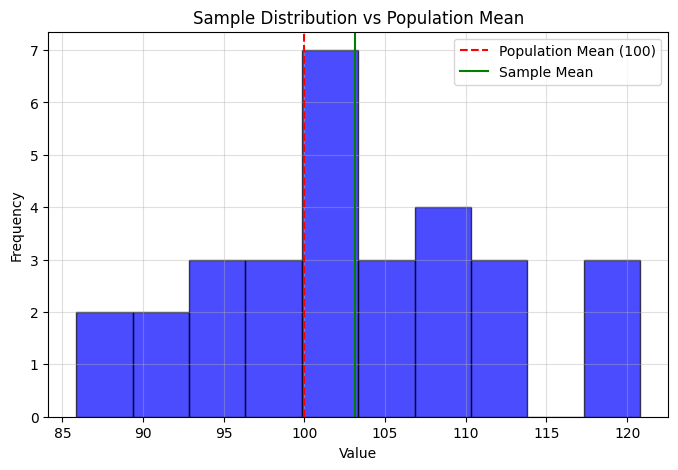

In [7]:
# Example: Hypothesis Testing
np.random.seed(42)
sample = np.random.normal(105, 10, 30)  # Mean = 105, std = 10, n = 30
population_mean = 100
t_stat, p_value = ttest_1samp(sample, population_mean)
print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.3f}")
if p_value < 0.05:
    print("Reject the null hypothesis: Sample mean is significantly different from population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

# Plot sample distribution
plt.figure(figsize=(8, 5))
plt.hist(sample, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(population_mean, color='red', linestyle='--', label='Population Mean (100)')
plt.axvline(np.mean(sample), color='green', linestyle='-', label='Sample Mean')
plt.title('Sample Distribution vs Population Mean')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

## 2. Point Estimation
Estimate the population mean from a sample.

In [8]:
# Point Estimation
sample_mean = np.mean(sample)
print(f"Sample Mean (Point Estimate of Population Mean): {sample_mean:.2f}")

Sample Mean (Point Estimate of Population Mean): 103.12


## 3. Interval Estimation
Compute a confidence interval for the sample mean.

95% Confidence Interval: (99.76, 106.48)


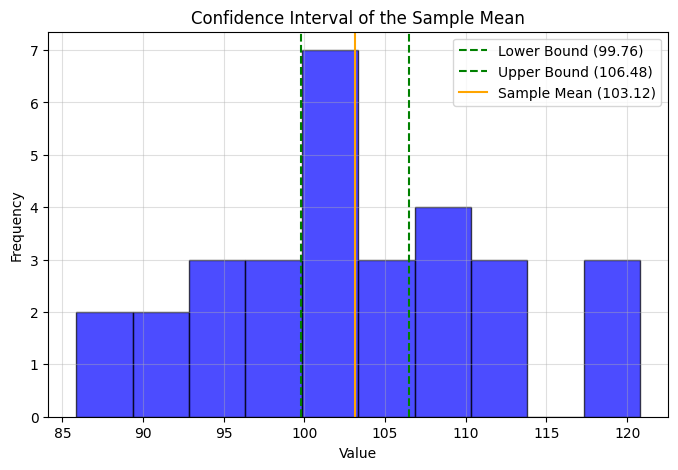

In [9]:
# Interval Estimation
confidence = 0.95
n = len(sample)
df = n - 1
sample_std = np.std(sample, ddof=1)
t_critical = t.ppf((1 + confidence) / 2, df)
margin_of_error = t_critical * (sample_std / np.sqrt(n))
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error
print(f"{confidence*100:.0f}% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

# Visualize Confidence Interval
plt.figure(figsize=(8, 5))
plt.hist(sample, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(ci_lower, color='green', linestyle='--', label=f'Lower Bound ({ci_lower:.2f})')
plt.axvline(ci_upper, color='green', linestyle='--', label=f'Upper Bound ({ci_upper:.2f})')
plt.axvline(sample_mean, color='orange', linestyle='-', label=f'Sample Mean ({sample_mean:.2f})')
plt.title('Confidence Interval of the Sample Mean')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

## 4. ANOVA
Test if there is a significant difference between the means of three groups.

In [11]:
group1 = np.random.normal(100, 10, 30)
group2 = np.random.normal(105, 10, 30)
group3 = np.random.normal(110, 10, 30)
f_stat, p_value_anova = f_oneway(group1, group2, group3)
print(f"F-Statistic: {f_stat:.2f}, P-Value: {p_value_anova:.3f}")
if p_value_anova < 0.05:
    print("Reject Null")

F-Statistic: 10.77, P-Value: 0.000
Reject Null
